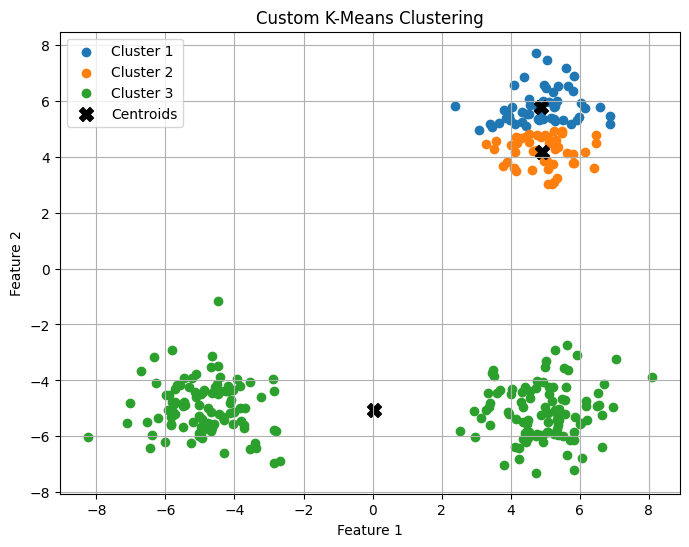

In [1]:
# Question 10: Implementing a Custom Clustering Algorithm
# Description: Design and implement a simple custom clustering algorithm using Python for educational purposes.

import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def custom_kmeans(X, k, max_iter=100, tolerance=1e-4):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    prev_centroids = np.copy(centroids)
    labels = np.zeros(X.shape[0])

    for i in range(max_iter):
        for j in range(X.shape[0]):
            distances = [euclidean_distance(X[j], centroid) for centroid in centroids]
            labels[j] = np.argmin(distances)

        for c in range(k):
            points_in_cluster = X[labels == c]
            if len(points_in_cluster) > 0:
                centroids[c] = np.mean(points_in_cluster, axis=0)

        if np.all(np.abs(centroids - prev_centroids) < tolerance):
            break

        prev_centroids = np.copy(centroids)

    return centroids, labels

np.random.seed(42)
X1 = np.random.randn(100, 2) + np.array([5, 5])
X2 = np.random.randn(100, 2) + np.array([-5, -5])
X3 = np.random.randn(100, 2) + np.array([5, -5])
X = np.vstack([X1, X2, X3])

k = 3
centroids, labels = custom_kmeans(X, k)

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f"Cluster {i+1}")
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=100, label="Centroids")
plt.title("Custom K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
